In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Housing_Modified.csv")
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no


In [3]:
df[["price","bathrms"]]

,price,bathrms
0,42000.0,1
1,38500.0,1
2,49500.0,1
3,60500.0,1
4,61000.0,1
...,...,...
541,91500.0,2
542,94000.0,2
543,103000.0,2
544,105000.0,2


In [4]:
np.shape(df)

(546, 12)

In [5]:
#calculate mean,max,min
print("max of price {}".format(df["price"].max()))
print("min of price {}".format(df["price"].min()))
print("mean of price {}".format(df["price"].mean()))

max of price 190000.0
min of price 25000.0
mean of price 68121.59706959708


In [6]:
df["bedrooms"].unique()

array([3, 2, 4, 1, 5, 6], dtype=int64)

In [7]:
df["airco"].unique()

array(['no', 'yes'], dtype=object)

In [8]:
#correlation analysis on data
df.corr()

,price,lotsize,bedrooms,bathrms,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.178178
garagepl,0.383302,0.352872,0.139117,0.178178,1.000000


In [9]:
price=df.iloc[:,0].values
lotsize=df.iloc[:,1].values

In [10]:
import matplotlib.pyplot as plt
plt.scatter(lotsize,price,c='green')
#plt.plot(lotsize,price,c='blue')
plt.title("price according to lotsize")
plt.xlabel("lotsize")
plt.ylabel("price")
plt.show()

<Figure size 640x480 with 1 Axes>

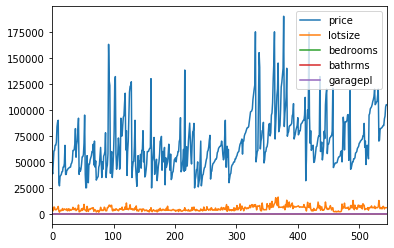

In [11]:
#compare data features
df.plot()

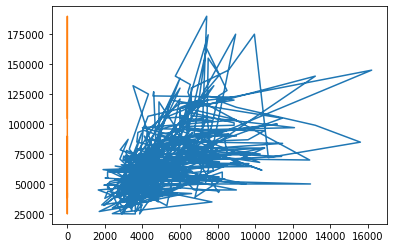

In [12]:
plt.plot(df[["lotsize","bedrooms"]],df["price"])

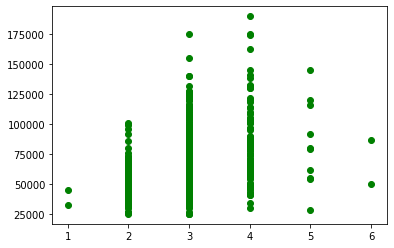

In [13]:
plt.scatter(df["bedrooms"],df["price"],c="green")

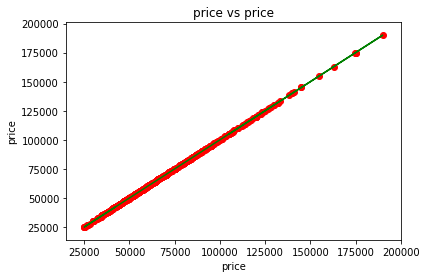

In [14]:
plt.plot(df["price"],df["price"],c="green")
plt.scatter(df["price"],df["price"],c="red")
plt.title("price vs price")
plt.xlabel("price")
plt.ylabel("price")
plt.show()

In [15]:
#convert text to number using Label Binazier
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
lb=LabelBinarizer()
le=LabelEncoder()
df.driveway=lb.fit_transform(df.driveway)
df.recroom=lb.fit_transform(df.recroom)
#df.stories=le.fit_transform(df.stories)


In [16]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,yes,no,no,1,no
1,38500.0,4000,2,1,one,1,0,no,no,no,0,no
2,49500.0,3060,3,1,one,1,0,no,no,no,0,no
3,60500.0,6650,3,1,two,1,1,no,no,no,0,no
4,61000.0,6360,2,1,one,1,0,no,no,no,0,no


In [17]:
df.corr()

,price,lotsize,bedrooms,bathrms,driveway,recroom,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.297167,0.254960,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.288778,0.140327,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,-0.011996,0.080492,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.041955,0.126892,0.178178
driveway,0.297167,0.288778,-0.011996,0.041955,1.000000,0.091959,0.203682
recroom,0.254960,0.140327,0.080492,0.126892,0.091959,1.000000,0.038122
garagepl,0.383302,0.352872,0.139117,0.178178,0.203682,0.038122,1.000000


In [20]:
data=pd.read_csv("Housing_Modified_prepared.csv")
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [1]:
df.corr()

NameError: name 'df' is not defined

In [39]:
#data transformation using normalisation
#implement standardization
#formala (X-Xmean)/Xstd
#X=independent variable
#Xstd = standard dev of x independent variable
#Xmean=mean of x variable
print("column data",data.columns)
print("maximum value of lotsize before transformation",data["lotsize"].max())
print("minimum value of lotsize before transformation",data["lotsize"].min())
print("mean value of lotsize before transformation",data["lotsize"].mean())

#Standardization or perform transformation using standard score
X=data["lotsize"] # select the independent variables
Xmean=X.mean() #calculate the mean of independent variable
Xstd=X.std()
Xnorm=(X-Xmean)/Xstd
print("X normalized after transformation",Xnorm)
print("maximum value of Xnorm after transformation",Xnorm.max())
print("minimum value of Xnorm after transformation",Xnorm.min())
print("mean value of Xnorm after transformation",Xnorm.mean())

column data Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')
maximum value of lotsize before transformation 16200
minimum value of lotsize before transformation 1650
mean value of lotsize before transformation 5150.2655677655675
X normalized after transformation 0      0.322732
1     -0.530526
2     -0.964074
3      0.691709
4      0.557955
         ...   
541   -0.161550
542    0.391915
543    0.391915
544    0.391915
545    0.391915
Name: lotsize, Length: 546, dtype: float64
maximum value of Xnorm after transformation 5.096367855203785
minimum value of Xnorm after transformation -1.6143954439482222
mean value of Xnorm after transformation -2.189945416705666e-16


In [48]:
independent_var=data.columns
independent_var=independent_var.delete(0)


In [62]:
x=data[independent_var]
y=data["price"]

In [63]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
Xnorm=scale.fit_transform(x)
print("Normalized data using standardization")
Xnorm

Normalized data using standardization


C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.32302806,  0.0472349 , -0.5694948 , ..., -0.68103375,
         0.35756661, -0.55337157],
       [-0.53101296, -1.31014696, -0.5694948 , ..., -0.68103375,
        -0.80452487, -0.55337157],
       [-0.96495812,  0.0472349 , -0.5694948 , ..., -0.68103375,
        -0.80452487, -0.55337157],
       ...,
       [ 0.39227462,  0.0472349 ,  1.42373699, ...,  1.46835601,
         0.35756661, -0.55337157],
       [ 0.39227462,  0.0472349 ,  1.42373699, ...,  1.46835601,
         0.35756661, -0.55337157],
       [ 0.39227462,  0.0472349 , -0.5694948 , ...,  1.46835601,
         0.35756661, -0.55337157]])

In [64]:
#Feature scaling to bring normalize data in commmon scale(0-1)
# feature scaling is also known as min max scaling
#formula for mean max scaling is Xnorm=(X-Xmin)/(Xmax-Xmin)
print("maximum value of lotsize before transformation",data["lotsize"].max())
print("minimum value of lotsize before transformation",data["lotsize"].min())
#print("mean value of lotsize before transformation",data["lotsize"].mean())



maximum value of lotsize before transformation 16200
minimum value of lotsize before transformation 1650


In [65]:
X=data["lotsize"] #select the variable
Xmin=data["lotsize"].min()
Xmax=data["lotsize"].max()
Xnorm=(X-Xmin)/(Xmax-Xmin)
print("Normalized value after Feature scaling")
Xnorm

Normalized value after Feature scaling


0      0.288660
1      0.161512
2      0.096907
3      0.343643
4      0.323711
         ...   
541    0.216495
542    0.298969
543    0.298969
544    0.298969
545    0.298969
Name: lotsize, Length: 546, dtype: float64

In [66]:
print("maximum value of Xnorm after transformation",Xnorm.max())
print("minimum value of Xnorm after transformation",Xnorm.min())

maximum value of Xnorm after transformation 1.0
minimum value of Xnorm after transformation 0.0


featured scaled independent variable after transformation


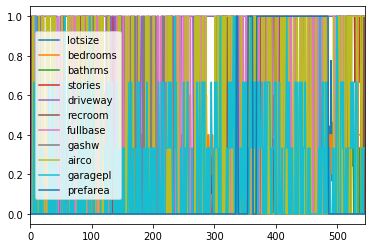

In [70]:
#feature Scaling
x=data[independent_var]
Xmin=x.min()
Xmax=x.max()
Xnorm=(x-Xmin)/(Xmax-Xmin)
print("featured scaled independent variable after transformation")
Xnorm.plot()

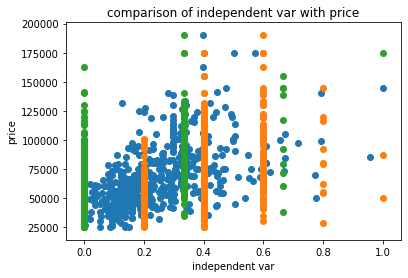

In [73]:
#calculate independent variable and its influence on price
import matplotlib.pyplot as plt
plt.scatter(Xnorm["lotsize"],data["price"])
plt.scatter(Xnorm["bedrooms"],data["price"])
plt.scatter(Xnorm["bathrms"],data["price"])
plt.title("comparison of independent var with price")
plt.xlabel("independent var")
plt.ylabel("price")
plt.show()

In [74]:
# perform feature scaling using min max scaler
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
Xnorm=scale.fit_transform(x)
print("tranformation using min max scaler")
Xnorm

tranformation using min max scaler


C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.28865979, 0.4       , 0.        , ..., 0.        , 0.33333333,
        0.        ],
       [0.16151203, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09690722, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29896907, 0.4       , 0.33333333, ..., 1.        , 0.33333333,
        0.        ],
       [0.29896907, 0.4       , 0.33333333, ..., 1.        , 0.33333333,
        0.        ],
       [0.29896907, 0.4       , 0.        , ..., 1.        , 0.33333333,
        0.        ]])

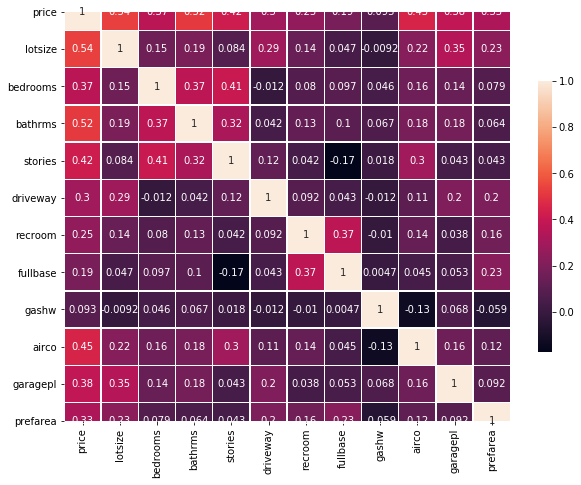

In [78]:
#create a correlation matrix using seabon and matplotlib
# Set up the matplotlib figure
import seaborn as sns
size = max(10, len(data.corr().columns)/2)
f, ax = plt.subplots(figsize=(size, size))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), annot=True, square=True, linewidths=.2, cbar_kws={"shrink": 0.5})